In [1]:
%pylab inline
from datetime import *
import scipy.stats as stats
from scipy.signal import *
from scipy.fftpack import fft
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [2]:
dayhr=24.0
daymin=24.0*60

In [3]:
arra=genfromtxt("AllStations_temperature_h.txt")

In [4]:
arr1=genfromtxt("DiscoveryElementary_temperature.txt")  

In [5]:
arr2=genfromtxt("JamesBay_temperature.txt") 

In [6]:
xs=arra[0,1:]
ys=arra[1,1:]
xs=array(xs)
ys=array(ys)

In [7]:
arr=[arr1,arr2]
x=[]
y=[]
for i in range(len(arr)):
    y.append(arr[i][3:])
x=array(x)
y=array(y)

In [8]:
yi=[]
for i in range(len(arr)):
    dtm=arr[i]
    arrn=dtm[~numpy.isnan(dtm)]
    tt=linspace(1,(len(dtm)-3)/daymin,len(arrn)-3)
    f=interp1d(tt,arrn[3:],kind='linear')
    t=linspace(1,(len(dtm)-3)/daymin,len(dtm)-3)
    interp=f(t)
    yi.append(interp)
yi=array(yi)

In [9]:
tt_startm = arr[0][0] -(7.0/24)
tt_start=arra[2,0]
day1start=date.toordinal(date(2012,1,1))+366 
day2start=date.toordinal(date(2017,1,1))+366
st=int(3+(day1start-tt_startm)*daymin)  
en=int(3+(day2start-tt_startm)*daymin) 
sth=int(2+(day1start-tt_start)*dayhr)  
enh=int(2+(day2start-tt_start)*dayhr) 

In [10]:
yii=[]
for i in range(len(yi)):
    yii.append(yi[i][st:en])
yii=array(yii)
ts=60
lnn=len(yii[0])
yh=[]

for i in range(len(yii)):
    datum=[]
    for j in range(lnn/ts):
        b=j*ts
        a=yii[i][b]
        datum.append(a)
    yh.append(datum)
yh=array(yh)
print len(yh[0])
print len(yh[1])

43848
43848


In [11]:
N=[]
for i in range(len(xs)):
    data=arra[2:,i+1][sth:enh]
    data1=data[~numpy.isnan(data)]
    tt=linspace(1,len(data)/24.0,len(data1))
    f=interp1d(tt,data1,kind='linear')
    t=linspace(1,1.0*len(data)/dayhr,len(data))
    interp=f(t)
    N.append(interp)

In [12]:
xst=[]
yst=[]
xsm=[236.349,236.620]
ysm=[48.652,48.417]
for i in range(len(xs)):
    xst.append(xs[i])
    yst.append(ys[i])
for i in range(len(xsm)):
    xst.append(xsm[i])
    yst.append(ysm[i])
    N.append(yh[i])
xst=array(xst)
yst=array(yst)

In [13]:
from datetime import datetime, timedelta

yt = np.arange(datetime(2012,1,1), datetime(2017,1,1), timedelta(hours=1)).astype(datetime)
print yt

[datetime.datetime(2012, 1, 1, 0, 0) datetime.datetime(2012, 1, 1, 1, 0)
 datetime.datetime(2012, 1, 1, 2, 0) ...,
 datetime.datetime(2016, 12, 31, 21, 0)
 datetime.datetime(2016, 12, 31, 22, 0)
 datetime.datetime(2016, 12, 31, 23, 0)]


In [14]:
M=pd.DataFrame(N,columns=yt)

In [15]:
M=transpose(M)

In [16]:
import seaborn as sns

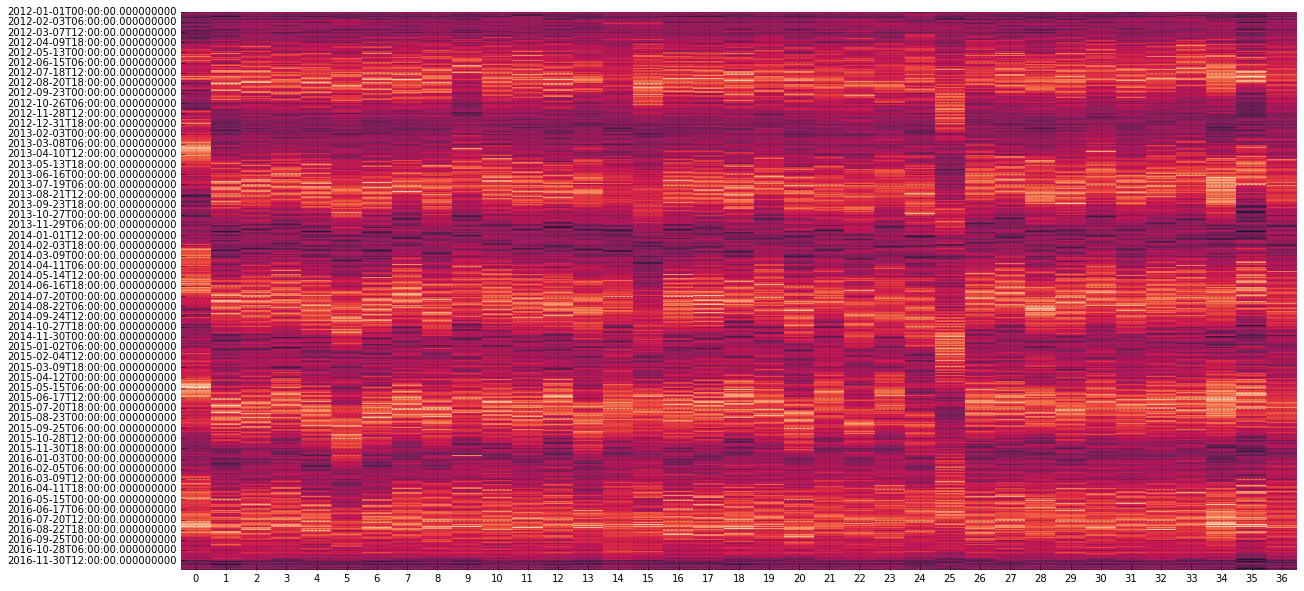

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(M, cbar=False, ax=ax)
ax.grid()

xticks(np.arange(37)+0.5, np.arange(0, 37, 1))

show()

In [18]:
C=M.corr()

In [19]:
eig_vals, eig_vecs = np.linalg.eigh(C)

In [20]:
eig_vals_norm = eig_vals/sum(eig_vals)
eig=[round(eig_vals_norm[-1],3),round(eig_vals_norm[-2],3),\
     round(eig_vals_norm[-3],3),round(eig_vals_norm[-4],3)]

In [21]:
mode1 = eig_vecs[:,-1]
mode2 = eig_vecs[:,-2]
mode3 = eig_vecs[:,-3]
mode4 = eig_vecs[:,-4]
mode=[mode1,mode2,mode3,mode4]

In [22]:
coast=genfromtxt("coast.txt")  

In [23]:
xx=coast[:,0]+360
yy=coast[:,1]

In [24]:
Xi=236.2
Xm=236.8
Yi=48.30
Ym=48.80
X=linspace(Xi,Xm,len(xx))
Y=linspace(Yi,Ym,len(yy))
X, Y = meshgrid(X, Y)
X_sub=xst
Y_sub=yst
rcParams.update({'font.size': 10, 'text.usetex': True})

In [25]:
point= zeros((len(X_sub), 2))
for i in range(len(X_sub)):
    point[i,0]=X_sub[i]
    point[i,1]=Y_sub[i]

In [32]:
modd=['linear','cubic']
u=1
mm=[]
for i in range(len(mode)):
    mm.append(griddata(point,mode[i],(X,Y),method=modd[u]))
mm=array(mm)

Name=['mode 1','mode 2','mode 3','mode 4']
Modd=['Linear','Cubic']

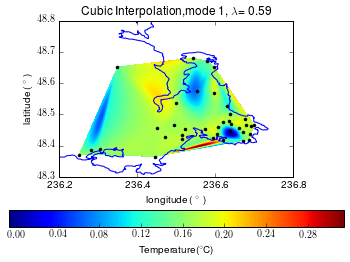

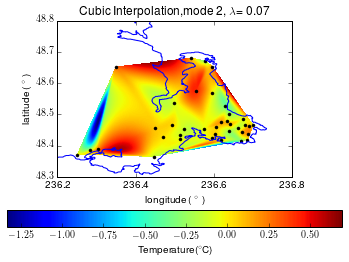

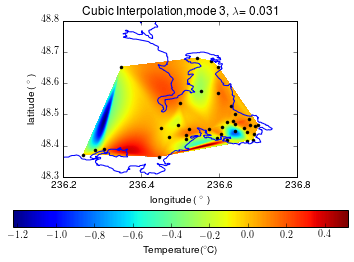

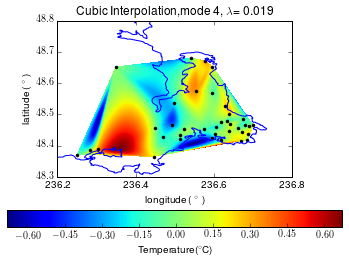

In [33]:
for i in range(len(mm)):
    imshow(mm[i],extent=[Xi,Xm,Ym,Yi],cmap='jet',aspect=0.8)
    plot(X_sub,Y_sub,'k.')
    xlabel('longitude ( $^\circ$ )')
    ylabel('latitude ( $^\circ$ )')
    plot(xx,yy)
    title('%s Interpolation,%s, $\lambda$= %s'%(Modd[u],Name[i],eig[i]))
    cb=colorbar(orientation='horizontal')
    cb.set_label('Temperature($^\circ$C) %')
    locs,labels = xticks()
    xticks(locs, map(lambda x: "%g" % x, locs))
    xlim(236.2,236.8)
    ylim(48.30,48.80)
    show()